# Transformer architecture


## Resurse

- [Annotated Transformer](//nlp.seas.harvard.edu/2018/04/03/attention.html) de la Harvard (este practic articolul *Attention is All You Need* adnotat cu cod)


- cea mai frumoasă vizualizare interactivă [aici](//poloclub.github.io/transformer-explainer/)!


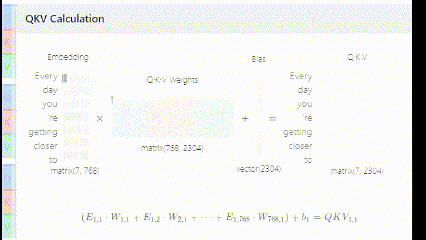

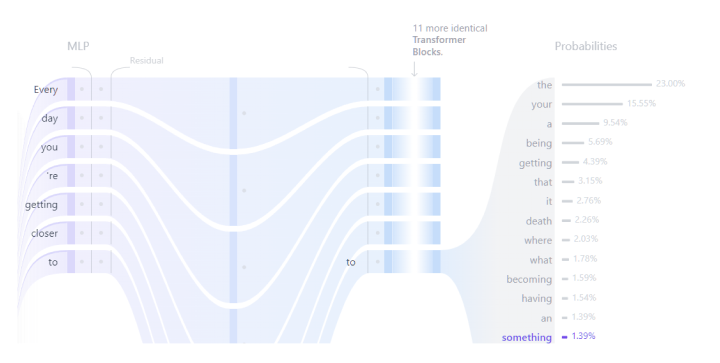

- StatQuest, foarte folositor

[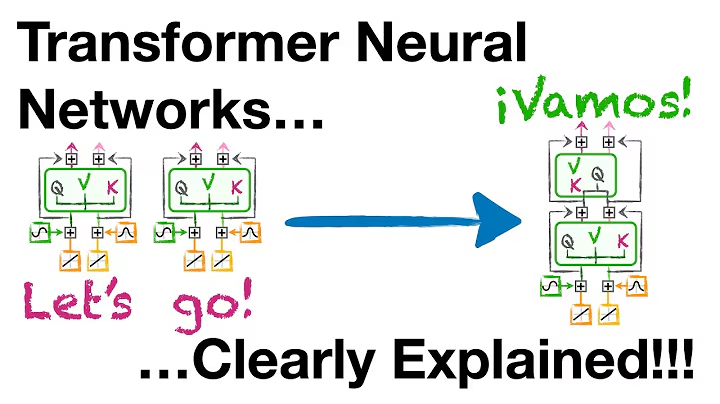](//www.youtube.com/watch?v=zxQyTK8quyY&t=50)

- după video-ul de mai sus ar trebui să fie mult mai clară diagrama din articolul original!

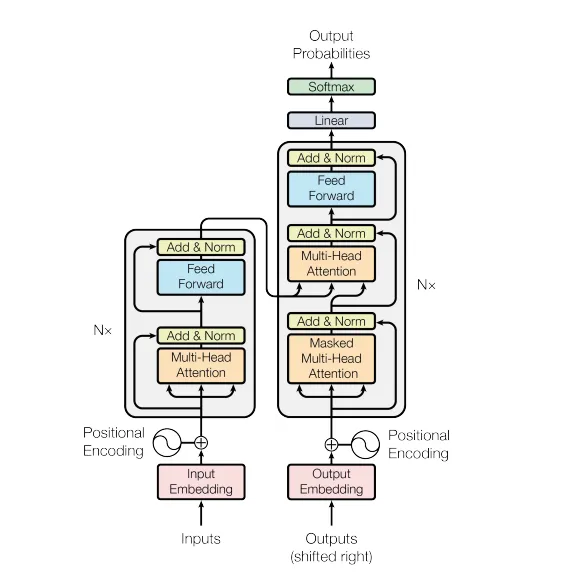

- intro pentru interpretabilitate [aici](//www.neelnanda.io/mechanistic-interpretability/quickstart)

- cum am putea să cuantificăm atenția? poate [așa](//aclanthology.org/2020.acl-main.385.pdf)

- datacamp, tutoriale interactive (parțial gratuite): [Transformer models with PyTorch](//campus.datacamp.com/courses/transformer-models-with-pytorch/the-building-blocks-of-transformer-models?ex=1)

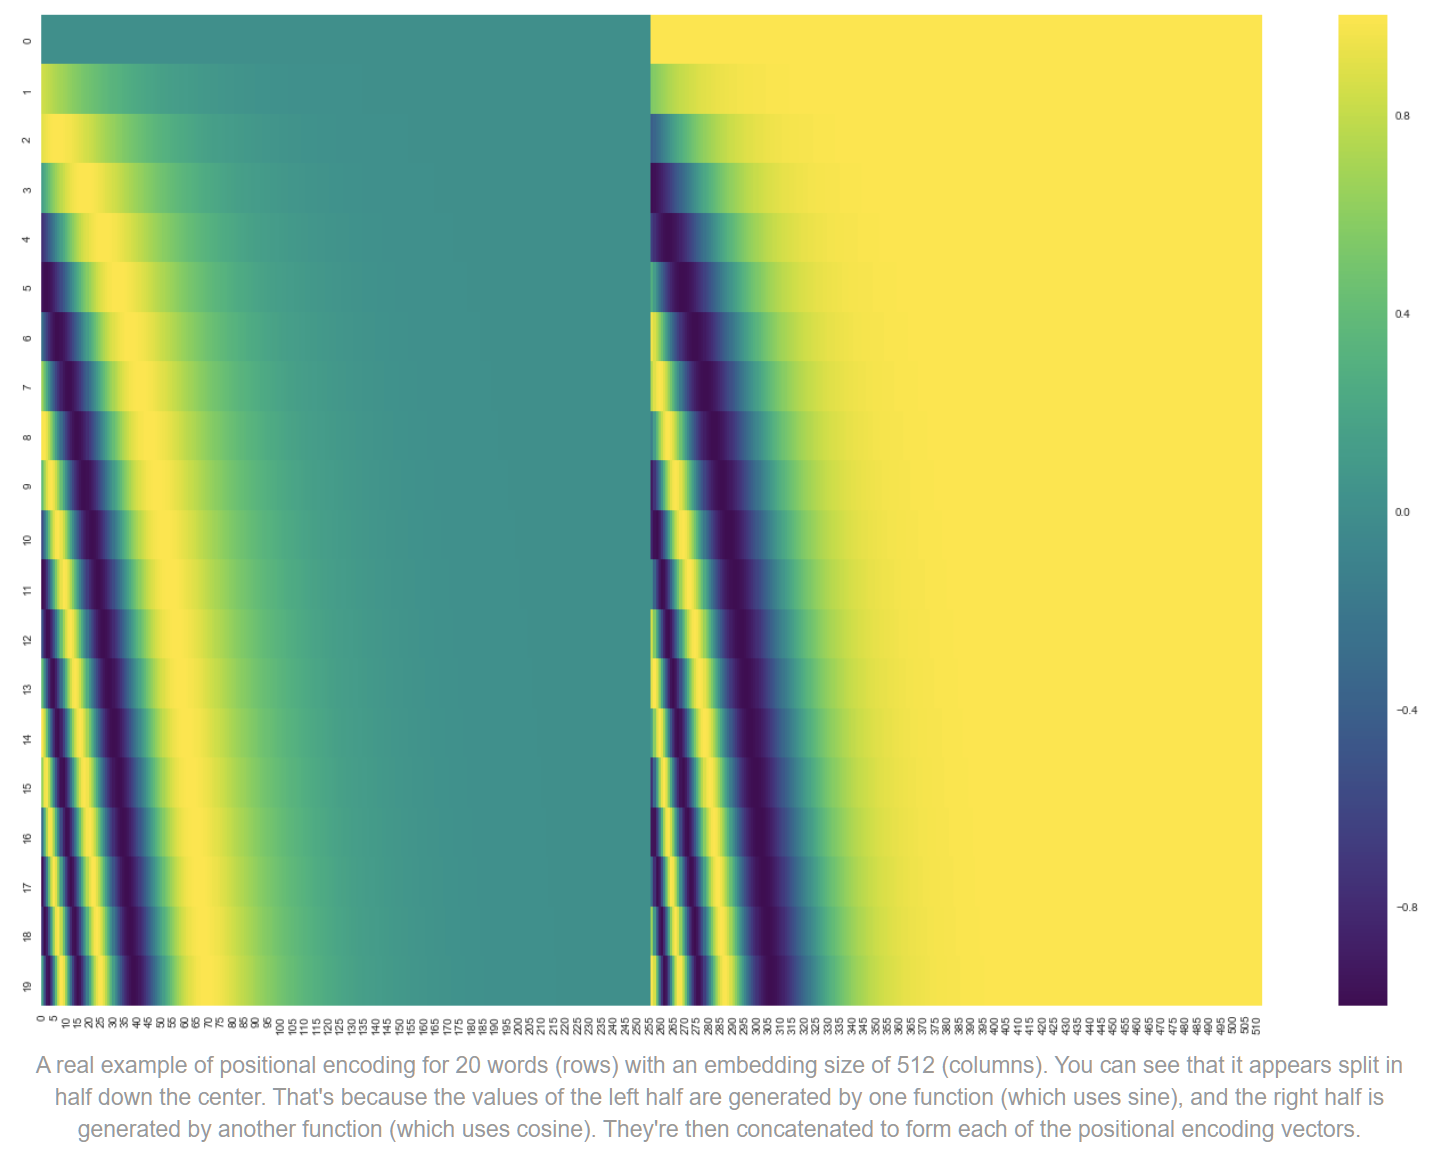

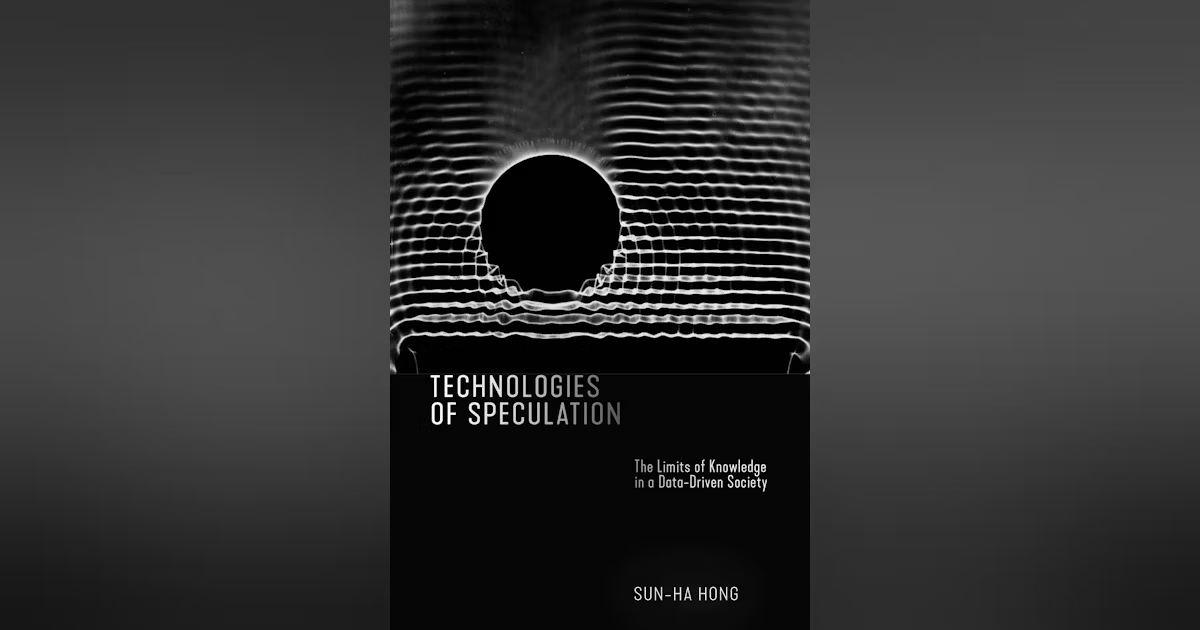

## Working with models from HuggingFace

Install the Transformers, Datasets, and Evaluate libraries first.

In [ ]:
! pip install datasets evaluate transformers[sentencepiece]

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(["Last lab! I've learned so much, yay!", "Last lab! I'm sorry it's over..."])


In [ ]:
classifier.model

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

Some of the currently available pipelines are:

* feature-extraction (get the vector representation of a text)
* fill-mask
* ner (named entity recognition)
* question-answering
* sentiment-analysis
* summarization
* text-generation
* translation
* zero-shot-classification

Let’s have a look at a few of these!

In [ ]:
classifier = pipeline("zero-shot-classification")
classifier(
    "A mammal with a short snout, catches mice and meows",
    candidate_labels=["cat", "dog", "hyrax"],
)

In [ ]:
filler = pipeline("fill-mask")
filler(
    "For breakfast today, I had a plate of green <mask>."
)

### Using any model from the Hub in a pipeline


The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the [Model Hub](//huggingface.co/models?sort=trending) and click on the corresponding tag on the left to display only the supported models for that task.

In [ ]:
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
classifier(["Highly recommend", "Nu mai cumpar asa ceva"])

Exercise: find Romanian models that work well on 2 tasks from the list above.

### Base vs. Instruct models


Exercise: use a text generation model to continue the following prompt: "The difference between a base model and an instruct model is "

### CO2 footprint

Training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the following graph.

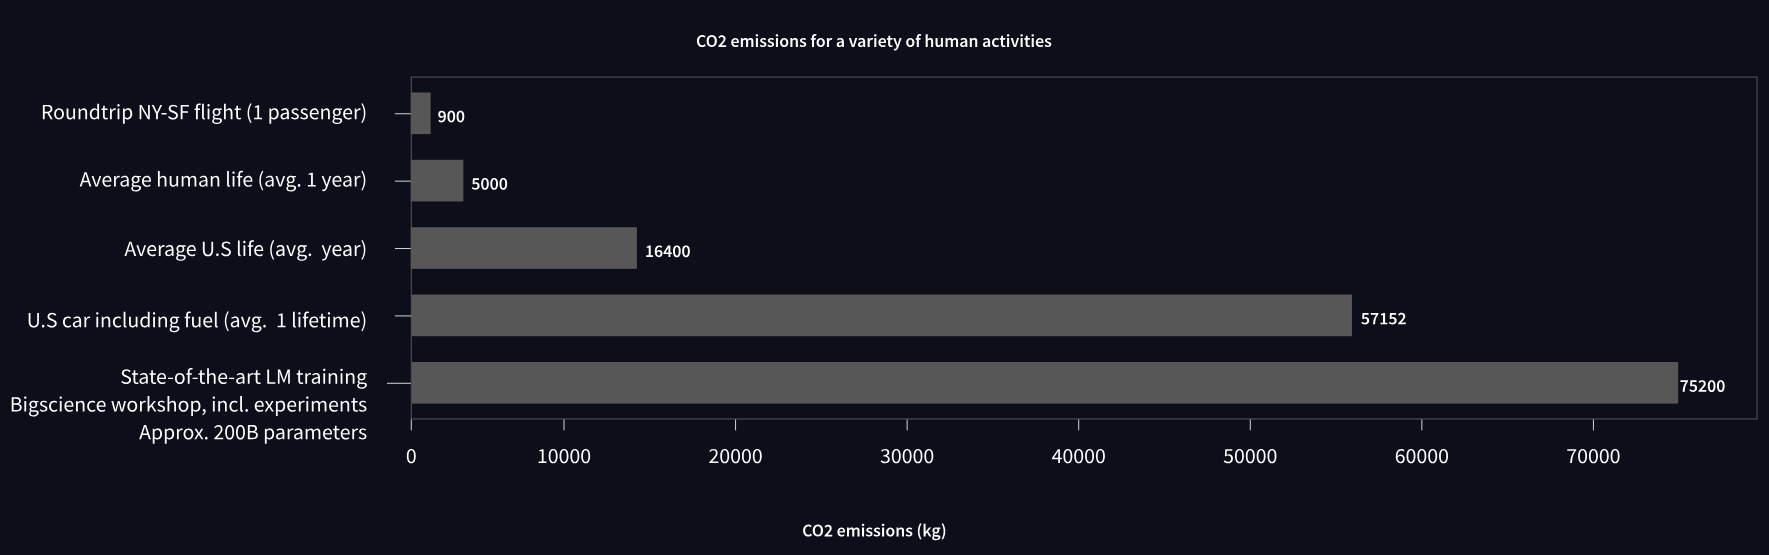

This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.

You can evaluate the carbon footprint of your models' training through several tools. For example, [ML CO2 Impact](//mlco2.github.io/impact/) or [Code Carbon](//codecarbon.io/) which is integrated in 🤗 Transformers. To learn more about this, you can read [this blog post](//huggingface.co/blog/carbon-emissions-on-the-hub) which will show you how to generate an ```emissions.csv``` file with an estimate of the footprint of your training.

Exercise: use the information from the blog post to display the footprint of training a model you used in the previous exercise.

The exercises and code above are part of the Huggingface NLP course. Explore the rest of it [here](//huggingface.co/learn/nlp-course/chapter1/3?fw=pt)!